In [5]:
words = open('names.txt', 'r').read().splitlines() #dataset

In [7]:
#realize, each name:
# emma : tells us:
# e is likely to be a starting char. m is likely to come after e, m is likely to come after em, a is likely to come after emm, and nothing is likely to come after emma
# in a bigram , we only look at 1 character back. meaning, after M, a is likely. (NOT EMM)



#BIGRAM IS ONLY 2 CHARACTERS at a time!

In [9]:
#explore what bigrams we have
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2) #character bigrams !

. e
e m
m m
m a
a .


In [11]:
#this above shows us the possible 2 character look backs, in which the <S> indicates Start, (so it can learn the next character is liekly to follow/or be the start)

In [13]:
#now create a hashmap kinda that stores the occurances of each bigram. this will help us see what bigrams are common and what likely follows what


b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)

        if not b.get(bigram):
            b[bigram] = 1
        else:
            b[bigram] += 1

In [15]:
b #statistics accorss the entire dataset

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [17]:
sorted(b.items(), key = lambda kv: -kv[1]) #sorted version . we use weird sorting system cuz we want it sorted by value (occurances) not by key . and we want it referse (max to min) so we use the lambda.. 

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [19]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos =  {i:s for s, i in stoi.items()}
stoi #map to integers, all characters in alphabet

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [21]:
import torch

N = torch.zeros((27,27), dtype = torch.int32) #28 by 28 because 26x26 for all character matrix, but we aso have start and end character so its +1

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 =  stoi[ch1] #get mapped integer value
        ix2 = stoi[ch2] #get the mapped integer value

        N[ix1, ix2] += 1 # update the tensor value array that was created above
    

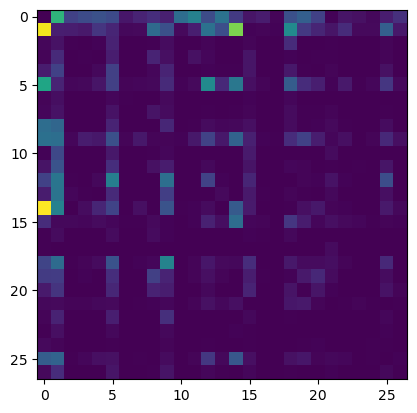

In [22]:
#visualize the data to see what characters come after each other i the matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [23]:
# convert to probabilities

p = N[0].float()
p = p/p.sum()
p #probabilities now of first letter and what itll be

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [24]:
#sample from the probability
g = torch.Generator().manual_seed(214783647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

11

In [25]:
itos[ix]

'k'

In [26]:
#WOrking bigram model
P = (N+1).float() #this is to smooth the model so that everythignis SOMEWHAT viable with the +1
P /= P.sum(1, keepdim=True)


g = torch.Generator().manual_seed(214783647)
for i in range(10):
    out = []
    ix = 0 #preceding character
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


kaa.
akyremilsandearvikyloria.
hte.
reckadevaiacadivi.
atayama.
a.
luloradan.
dror.
ancherwite.
drin.


In [37]:
# log(A*B*C) = log(a) + log(b) + log(c)

In [53]:
#loss function

log_likelihood = 0.0
n = 0


for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 =  stoi[ch1] 
        ix2 = stoi[ch2]
        prob =P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} : {logprob:.4f}')

print("LOG" + str(log_likelihood))
normalized_log_likelihood = -log_likelihood/n
print("NLL" + str(normalized_log_likelihood) )

.e: 0.0478 : -3.0408
em: 0.0377 : -3.2793
mm: 0.0253 : -3.6772
ma: 0.3899 : -0.9418
a.: 0.1960 : -1.6299
.o: 0.0123 : -4.3982
ol: 0.0780 : -2.5508
li: 0.1777 : -1.7278
iv: 0.0152 : -4.1867
vi: 0.3541 : -1.0383
ia: 0.1381 : -1.9796
a.: 0.1960 : -1.6299
.a: 0.1377 : -1.9829
av: 0.0246 : -3.7045
va: 0.2495 : -1.3882
a.: 0.1960 : -1.6299
LOGtensor(-38.7856)
NLLtensor(2.4241)
